In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [64]:
con = sqlite3.connect('C:/Users/user/Documents/Projects/database.sqlite')

In [65]:
type(con)

sqlite3.Connection

In [4]:
df = open('C:/Users/user/Documents/Projects/database.sqlite')

In [6]:
# df = pd.read_sql_query("select * from Reviews",con)

In [7]:
df = pd.read_csv('Reviews.csv')

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(568454, 10)

In [10]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [11]:
df['Summary'][0]

'Good Quality Dog Food'

In [12]:
text = df['Summary'][0]

# Perform Sentiment Analysis on Data

In [13]:
#Install the necessary modules and packages
!pip install TextBlob
from textblob import TextBlob

In [14]:
TextBlob(text).sentiment.polarity

0.7

In [15]:
polarity = []
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [16]:
len(polarity)

568454

In [17]:
#copy the original data
data = df.copy()

In [18]:
#create a column titled "Polarity"
data['Polarity']=polarity

In [19]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


# Perform Exploratory Data Analysis for the Positive Sentences

In [20]:
#Install the necessary modules and packages
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS  #Be VERY CAREFUL, it is "WordCloud" and not "wordcloud" after the import functioin
import re                                  #useful in cleaning and modifying text data

In [21]:
#IMPORTANT!!!!
stopwords = set(STOPWORDS)

In [22]:
#create a separate dataframe for the rows with positive polarity i.e polarity > 0
data_positive = data[data['Polarity']>0]

In [23]:
data_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [24]:
#Create a single variable with all the summaries so as to make the removal of STOPWORDS faster
total_text = (' '.join(data_positive['Summary']))

In [25]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [26]:
#substitute every symbol(!"\'.) except(^) a-z with space in the variable "total_text"
total_text = re.sub('[^a-zA-Z]', ' ', total_text)

In [27]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [28]:
#Remove excess spacing
total_text = re.sub(' +', ' ', total_text)

In [29]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

### Find popular words i.e words that occur regularly

(-0.5, 999.5, 499.5, -0.5)

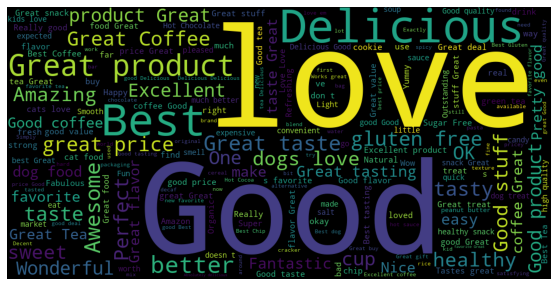

In [30]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_text)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off') #to remove the axis number from showing

# Perform Exploratory Data Analysis for the Negative Sentences

In [31]:
#create a separate dataframe for the rows with negative polarity i.e polarity < 0
data_negative = data[data['Polarity']<0]

In [32]:
data_negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-0.400
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1.000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",-0.625
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",-0.125
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,-0.500


In [33]:
#Create a single variable with all the summaries so as to make the removal of STOPWORDS faster
total_text2 = (' '.join(data_negative['Summary']))

In [34]:
total_text2[0:1000]

"poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley's Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don't Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [35]:
#substitute every symbol(!"\'.) except(^) a-z with space in the variable "total_text2"
total_text2 = re.sub('[^a-zA-Z]', ' ', total_text2)

In [36]:
total_text2[0:1000]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [37]:
#Remove excess spacing
total_text2 = re.sub(' +', ' ', total_text2)

In [38]:
total_text2[0:1000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

### Find popular words i.e words that occur regularly

(-0.5, 999.5, 499.5, -0.5)

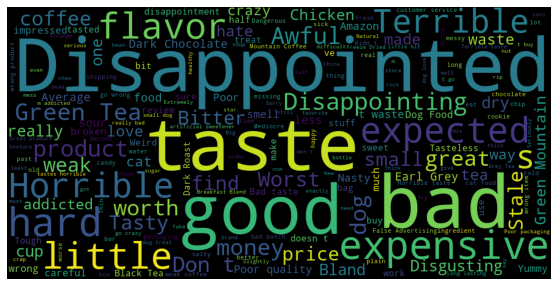

In [39]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_text2)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off') #to remove the axis number from showing

# Analyse to what user, Amazon can recommend more products

### Amazon will recommend more products to users who:
##### Buy 2 or more products
##### Have a better conversion rate

In [40]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [41]:
df.shape

(568454, 10)

In [42]:
# The number of unique users

df['UserId'].nunique() 

256059

##### Out of 568454 rows, there are 256059 UNIQUE users which shows that there are many people who bought more than 1 product

### Create a table to see how often a unique ID buys from Amazon

In [43]:
raw = df.groupby('UserId').agg({'Summary': 'count', 'Text': 'count', 'Score': 'mean', 'ProductId': 'count'})

In [44]:
raw = raw.sort_values(by='ProductId', ascending = False)

In [45]:
raw.columns = ['Summary_no', 'Text_no', 'Score_mean', 'Purchased_product_no']

In [46]:
raw.head()

,Summary_no,Text_no,Score_mean,Purchased_product_no
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256


In [47]:
user_10 = raw.index[0:10]
user_10

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A1TMAVN4CEM8U8', 'A2MUGFV2TDQ47K', 'A3TVZM3ZIXG8YW',
       'A3PJZ8TU8FDQ1K', 'AQQLWCMRNDFGI'],
      dtype='object', name='UserId')

In [48]:
height = raw['Purchased_product_no'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

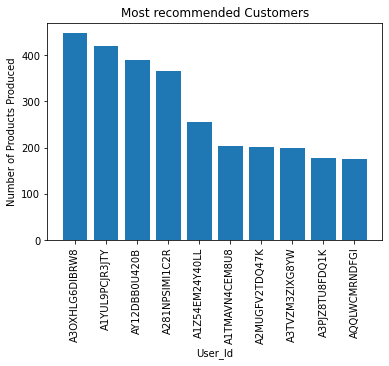

In [49]:
plt.bar(user_10, height)
plt.title('Most recommended Customers')
plt.xlabel('User_Id')
plt.ylabel('Number of Products Produced')
plt.xticks(rotation= 'vertical') #Convert the orientation of the xlabels to vertical to make it more legible

# Analyse Length of Comments whether Customers are going to give Lengthy comments or short one

#### As data is so huge,so if your system takes a lot for the execution , u can considered some sample of data from entire data

In [98]:
# Pick a random sample
final = df.sample(n = 2000)

In [99]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
451490,451491,B000QU3JM0,AOOGACWQSEJDU,Red,0,1,4,1335052800,Not bad,"not the best, but it has all the right flavor..."
89562,89563,B002LANN56,A23R3EOZ837242,"Colin Brown ""Colin Brown Microsoft MVP""",0,0,4,1347235200,Dog loves it,It's a little hard to write a review on a prod...
242820,242821,B0009YF43U,A7Y9MP7H8LYUE,"K. E. Steelman ""mommarock""",0,0,4,1284681600,Great Treats for Clicker Training,I tried these treats after the success I had w...
216511,216512,B0039556K2,A29OJLIQ46MGKX,"Kelly M. Dunn ""newmommy""",0,0,5,1316131200,Drinking Dessert,The best tasting K-Cups out there. It is like ...
231869,231870,B004IS56YA,A2LTAUPEH82UQ5,kestela,0,0,5,1350777600,"LOVE,LOVE,LOVE THEM!",These may be the best popcorn/ chips I've ever...


In [121]:
final=df[0:2000]

#### check missing values in dataset

In [55]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

#### check for data duplicates

In [53]:
final.duplicated().sum()

0

#### calculate the length of comments of each customer

In [56]:
def calc_length(text):
    return (len(text.split(' ')))

In [102]:
final['Text_length'] = final['Text'].apply(calc_length)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


#### Generate a box plot

In [66]:
!pip install plotly

In [67]:
import plotly.express as px

In [86]:
px.box(final, y="Text_length")

#### Analyze the Score

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

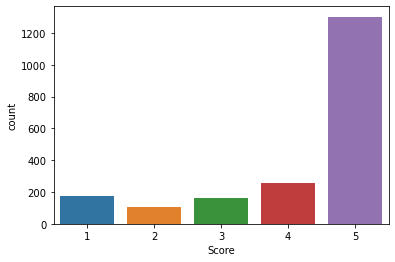

In [87]:
sns.countplot(final['Score'])

# Analysing Behaviour of Customer

#### Change all the text to lowercase

In [122]:
final['Text'] = final['Text'].str.lower()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
print(final['Text'][164])

seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.


In [91]:
re.sub('[^a-zA-Z]',' ',final['Text'][164])

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [93]:
print(final['Text'][164])

seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.


#### drawback of this re.sub in this use-case is, it will remove some numerical data too & may be that numerical values matters alot
#### thats way, I am going to create my own logic over here,that will remove all the special character

In [94]:
import string #This module is needed to import punctuation

In [120]:
punctuations = string.punctuation

#### Create a function to remove punctuation from a dataframe

In [123]:
def remove_punc(review):
    no_punc = ""
    for char in review:
        if char not in punctuations:
            no_punc = no_punc + char
    return no_punc

In [124]:
final['Text'] = final['Text'].apply(remove_punc)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
print(final['Text'][164])

 seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor


                 You can see that although all punctuations are gone, the numbers remain

#### Remove stopwords

In [111]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [125]:
data = final['Text'][164]

In [127]:
re = [word for word in data.split(" ") if word not in set(stopwords.words('english'))]
str = ''
for wd in re:
    str = str + wd
    str = str + ' '
    
str

'  seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

#### Use join to convert list into string

In [156]:
da =[word for word in data.split(' ') if word not in set(stopwords.words('english'))]
' '.join(da)

'  seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [134]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [135]:
final['Text'] = final['Text'].apply(remove_stopwords)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
final['Text'][164]

'  seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

### Get rid of hyperlinks (http)

In [151]:
# contains_https = final['Text'].str.contains('http?')
contains_https = final[final['Text'].str.contains('http?')]
contains_https['Text'][21] # The index of the rows remain the same. The index doesn't restart from 0

'  bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [153]:
review = contains_https['Text'][21]

In [158]:
import re

In [159]:
url_pattern = re.compile(r'href|http.\w+')
url_pattern.sub(r'', review)

'  bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [160]:
def remove_http(review):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', review)

In [161]:
final['Text'] = final['Text'].apply(remove_http)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
final['Text'][21]

'  bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [163]:
# How many rows contain 'http'?
final['Text'].str.contains('http').sum()

0

In [164]:
final['Text'][34]

'  instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybr br mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

In [165]:
# How many rows contain 'br'
final['Text'].str.contains('br').sum()

752

                            That is a lot of rows

In [166]:
# Replace 'br' with ''. So basically remove 'br' from the string
for i in range(len(final['Text'])):
    final['Text'][i] = final['Text'][i].replace('br', '')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Display most frequent words

In [167]:
# Join all the sentences to 1 big string
comment_words = ' '.join(final['Text'])

In [172]:
stopwords = set(stopwords.words('english'))

(-0.5, 999.5, 499.5, -0.5)

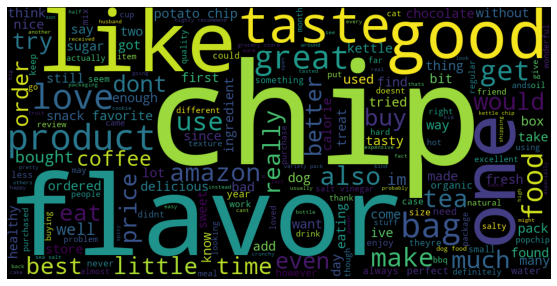

In [173]:
wordcloud3 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(comment_words)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud3)
plt.axis('off') #to remove the axis number from showing

      THESE ARE THE KEY WORDS SHOWING THE BEHAVIOUR OF THE CUSTOMER